In [1]:
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
stocks = ['fsdix']
weights = [1]


In [3]:
sect_totals = {}
indus_totals = {}

In [13]:
fund = yf.Ticker('spy')

In [14]:
d = fund.get_info()

In [15]:
d.keys()

dict_keys(['exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'profitMargins', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'forwardEps', 'revenueQuarterlyGrowth', 'fundInceptionDate', 'annualReportExpenseRatio', 'totalAssets', 'bookValue', 'fundFamily', 'lastFiscalYearEnd', 'netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'nextFiscalYearEnd', 'yield', 'mostRecentQuarter', 'enterpriseValue', 'priceHint', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'priceToSalesTrailing12Months', 'pegRatio', 'ytdReturn', 'forwardPE', 'maxAge', 'lastCapGain', 'category', 'fiveYearAverageReturn', 'phone', 'longBusinessSummary', 'companyOfficers', 'p

In [16]:
d['quoteType']

'ETF'

In [17]:
for t in stocks:
    idx = stocks.index(t) 
    obj = yf.Ticker(t)
    d = obj.get_info()
    ty = d['quoteType']

    if ty == 'MUTUALFUND' or ty == 'ETF':
        if ty not in sect_totals.keys():
            sect_totals[ty] = weights[idx]
        else: 
            sect_totals[ty] = sect_totals[ty]+ weights[idx]
    else:
        sect = d['sector']
        ind = d['industry']
        if sect not in sect_totals.keys(): 
            sect_totals[sect] = weights[idx]
        else: 
            sect_totals[sect] = sect_totals[sect] + weights[idx]
        if ind not in indus_totals.keys(): 
            indus_totals[ind] = weights[idx]
        else: 
            indus_totals[ind] = indus_totals[ind] + weights[idx]


KeyError: 'sector'

In [13]:
sect_totals

{'Industrials': 0.3, 'Financial Services': 0.5, 'Energy': 0.2}

In [14]:
indus_totals

{'Conglomerates': 0.3, 'Banks—Diversified': 0.5, 'Oil & Gas Integrated': 0.2}

In [22]:
testd = yf.Ticker('JNJ').get_info()

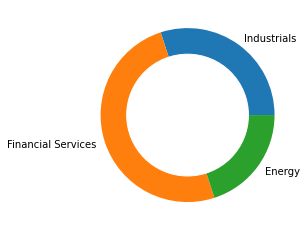

In [33]:
plt.pie(sect_totals.values(), labels=sect_totals.keys())

my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gca()
p.add_artist((my_circle))
